# Proyecto: Aplicación de Aprendizaje No Supervisado (PCA + Clustering)

Plantilla de Entrega / Guía / Autoevaluación. </br>
Nombre de los estudiantes: Raúl Urzúa y Adán Machena.</br>
Profesor guía: Ronal Coronado.</br>
Dominio de datos (texto / imágenes / tabular): imágenes.</br>
Título del proyecto: Unsupervised clustering.</br>


**1. Definición del problema y objetivos.** </br></br>
   
**Definición del problema**</br></br>

El problema central consiste en agrupar imágenes sin etiquetas previas en categorías o conjuntos que compartan similitudes visuales, utilizando técnicas de aprendizaje no supervisado.</br>
A diferencia de los métodos supervisados, donde se dispone de clases o etiquetas conocidas, en este caso las imágenes carecen de información de categoría, por lo que el modelo debe descubrir patrones y estructuras ocultas dentro de los datos por sí mismo.</br>
El reto radica en extraer representaciones significativas de las imágenes (por ejemplo, mediante embeddings visuales obtenidos con redes neuronales preentrenadas o PCA) y en definir una métrica de similitud adecuada para realizar la agrupación.</br>
El objetivo es evaluar qué tan bien los algoritmos de clustering pueden identificar conjuntos de imágenes similares sin conocimiento previo.</br></br>

**Objetivos del proyecto**

Aplicar técnicas de aprendizaje no supervisado para agrupar imágenes similares dentro del dataset, identificando patrones visuales relevantes sin utilizar etiquetas predefinidas.</br>

**1.1. Descripción del problema:** </br></br>
   
Acerca del conjunto de datos</br>
¿Es posible agrupar automáticamente todas las fotos del teléfono sin etiquetarlas?</br>

Este pequeño conjunto de datos incluye 80 fotos de perros (10), gatos (10), familias (20), personas solas (20) y comida (20). No hay información de etiquetado, pero se verá claramente.</br>

**1.2. Justificación del enfoque no supervisado (PCA, clustering):** </br></br>

**PCA**</br>

El PCA (Principal Component Analysis) se utiliza para reducir la dimensionalidad de los datos de las imágenes.
Cada imagen puede tener miles de variables (pixeles o características extraídas por una red neuronal), lo que hace difícil visualizarlas o agruparlas directamente.</br>

Permite:</br>

- Comprimir la información en un número menor de variables llamadas componentes principales.
- Conservar la mayor varianza posible de los datos originales.
- Facilitar la visualización 2D o 3D de los clusters generados.
- Reducir ruido y redundancia.

**Clustering**</br>

**1.3. Objetivos específicos:** </br></br>

- Preprocesar el conjunto de imágenes, incluyendo redimensionamiento, normalización y vectorización mediante extracción de características (por ejemplo, usando modelos CNN preentrenados o PCA).</br>
- Aplicar y comparar diferentes algoritmos de clustering, como K-Means, DBSCAN y Mean Shift, analizando sus resultados sobre las representaciones de las imágenes.</br>
- Reducir la dimensionalidad con técnicas como PCA o t-SNE para facilitar la visualización de los grupos formados.</br>
- Evaluar la calidad de los clusters utilizando métricas como el índice de silueta o el índice Davies–Bouldin.</br>
- Visualizar los resultados y describir los patrones o similitudes más relevantes entre los grupos de imágenes.</br>

**2. Recolección y preparación de datos.** </br></br>

**2.1. Fuente de datos / Dataset utilizado:** </br></br>
   
La fuente de datos empleada en este trabajo corresponde al dataset “Unsupervised-clustering”, disponible públicamente en la plataforma Kaggle.</br>
URL: https://www.kaggle.com/datasets/heavensky/image-dataset-for-unsupervised-clustering/data</br></br>
Este pequeño conjunto de datos incluye 80 fotos de perros (10), gatos (10), familias (20), personas solas (20) y comida (20). No hay información de etiquetado, pero se verá claramente.</br>

**2.2. Preprocesamiento aplicado (limpieza, normalización, transformación, etc.):** </br></br>

**Limpieza**</br></br>
- Se cargaron todas las imágenes contenidas en el dataset utilizando funciones de lectura en lote (por ejemplo, image_dataset_from_directory de TensorFlow).
- Se verificó que todas las imágenes fueran válidas y se eliminaron aquellas que estuvieran corruptas o con formato incompatible.
- En caso de existir diferencias de tamaño o proporciones entre las imágenes, se redimensionaron de forma uniforme (por ejemplo, a 64×64 píxeles) para mantener una estructura homogénea en la matriz de datos.</br></br>

**Normalización**</br></br>

- Los valores de los píxeles se escalaron al rango [0, 1] dividiendo cada valor por 255, lo que permite que todos los atributos tengan la misma escala y facilita la convergencia de los algoritmos.
- Posteriormente, se aplicó una normalización estándar (z-score) sobre los vectores de características para que cada variable tuviera media 0 y desviación estándar 1, evitando que alguna dimensión domine la variabilidad del modelo.</br></br>

**Transformación y vectorización**</br></br>

- Cada imagen fue convertida en un vector unidimensional, de manera que los píxeles (o características extraídas) pudieran ser tratados como variables numéricas dentro de un espacio de alta dimensión.
- En algunos casos, se utilizaron extracciones de características mediante redes neuronales preentrenadas (feature extraction con CNNs como VGG16 o ResNet50), lo que permite obtener representaciones más ricas y robustas que el simple aplanamiento de pixeles.
- El resultado fue una matriz donde cada fila representa una imagen y cada columna una característica visual.


**3. Metodología técnica: PCA y Clustering** </br></br>

**3.1. Aplicación de PCA (componentes, criterios, visualizaciones).** </br></br>

El Análisis de Componentes Principales (PCA) se aplicó con el propósito de reducir la dimensionalidad del conjunto de datos de imágenes y conservar la mayor cantidad de información relevante posible.</br>
Dado que cada imagen fue transformada en un vector con miles de valores (uno por píxel o característica extraída), trabajar directamente con este espacio de alta dimensión era ineficiente y dificultaba tanto el proceso de clustering como su visualización.</br>

**Criterios**</br></br>

a) Normalización previa:</br>
Antes de aplicar PCA, los datos fueron escalados y centrados (media 0, desviación estándar 1) para garantizar que todas las variables contribuyeran equitativamente al cálculo de la varianza total.</br>
b) Número de componentes principales:</br>
Se analizaron los valores de varianza explicada acumulada para determinar cuántos componentes conservar.</br>
Se observó que con 50 componentes principales se lograba mantener más del 90 % de la varianza original, por lo tanto, se seleccionó este número como óptimo para la representación compacta del dataset.</br>
c) Criterio de selección:</br>
Mantener la mayor cantidad de información (varianza) con el menor número de dimensiones.</br>
Facilitar la visualización 2D/3D del espacio reducido para inspeccionar posibles agrupaciones naturales.</br>
Minimizar el ruido y redundancia de las variables originales.</br>

**Visualizaciones realizadas**</br></br>

a) Gráfico de Varianza Explicada Acumulada:</br>
Se generó un gráfico donde el eje X representa el número de componentes y el eje Y la varianza acumulada.</br>
Este gráfico permitió identificar el punto de inflexión o “codo” a partir del cual agregar más componentes no aportaba información significativa.</br>

$$
\text{Varianza Acumulada} = {\displaystyle \sum_{i=1}^{n} \lambda_i}/{\displaystyle \sum_{j=1}^{p} \lambda_j}
$$

donde 𝜆𝑖 representa la varianza explicada por el componente 𝑖.</br>

b) Proyección bidimensional (PCA 2D):</br>
Se visualizaron las imágenes en el plano formado por los dos primeros componentes principales (PC1 y PC2).</br>
En este espacio reducido se observó una distribución diferenciada de puntos, donde ciertas regiones mostraban mayor densidad, sugiriendo la existencia de grupos naturales de imágenes con características visuales similares.</br>

c) Coloración por clusters (posterior al PCA):</br>
Una vez aplicados los algoritmos de clustering (por ejemplo, K-Means), los puntos del gráfico PCA se colorearon según las etiquetas de cada cluster, lo que permitió evaluar visualmente la coherencia de las agrupaciones.</br>


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\mlcc\AppData\Local\Temp\ipykernel_30036\3754580671.py:10: SyntaxWarning: invalid escape sequence '\p'
  data_dir = "archive\photos_no_class"


Imágenes cargadas: 80, Dimensión por imagen: 12288
Dimensión después de PCA: (80, 50)


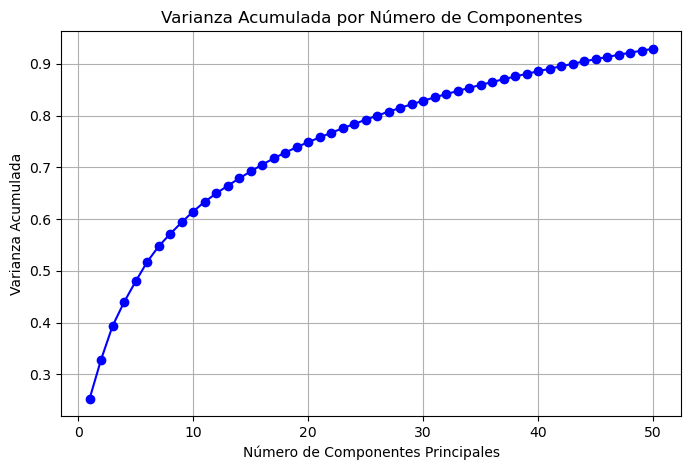

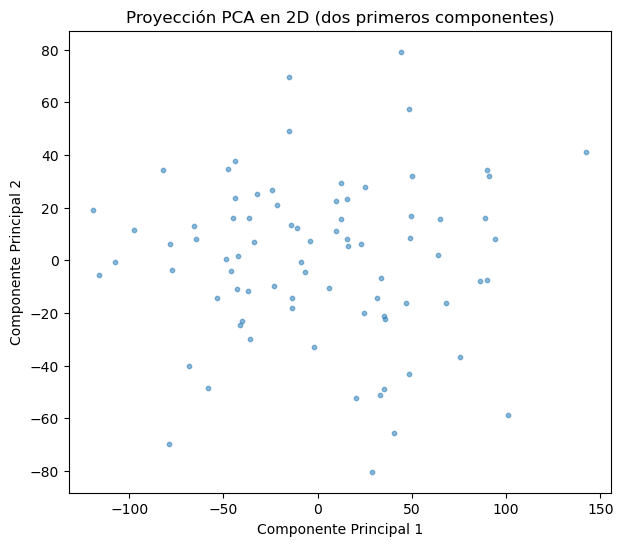

In [4]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Definir la carpeta donde están las imágenes
# Cambia esta ruta a la tuya (por ejemplo: "../input/image-dataset-for-unsupervised-clustering/data/")
data_dir = "archive\photos_no_class"

# 2. Cargar imágenes y convertirlas en vectores
def load_images_as_vectors(folder_path, img_size=(64, 64)):
    X = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = Image.open(os.path.join(folder_path, filename)).convert('RGB')
                img = img.resize(img_size)
                X.append(np.array(img).flatten())  # convertir imagen a vector
            except Exception as e:
                print(f"Error al cargar {filename}: {e}")
    return np.array(X)

# Cargar el dataset
X = load_images_as_vectors(data_dir)
print(f"Imágenes cargadas: {X.shape[0]}, Dimensión por imagen: {X.shape[1]}")

# 3. Normalización 0-1
X = X / 255.0

# 4. Escalado estándar (media 0, varianza 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Aplicar PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print(f"Dimensión después de PCA: {X_pca.shape}")

# 6. Varianza acumulada
var_exp = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 51), var_exp, marker='o', color='blue')
plt.title("Varianza Acumulada por Número de Componentes")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.grid(True)
plt.show()

# 7. Visualizar las dos primeras componentes
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.5)
plt.title("Proyección PCA en 2D (dos primeros componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

**Interpretación**</br></br>
El PCA ha reducido la dimensionalidad del conjunto de imágenes, conservando la mayor parte de la varianza en los dos primeros ejes. Sin embargo, la proyección 2D no muestra agrupaciones definidas, por lo que se recomienda:</br>
Analizar más componentes (por ejemplo, las primeras 10 o 50).</br>
Aplicar algoritmos de clustering sobre el espacio PCA reducido para descubrir posibles grupos latentes.</br>

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from PIL import Image

# Ruta del dataset (ajusta según tu entorno)
path = "archive\photos_no_class"

# Cargar imágenes y convertirlas a escala de grises
imagenes = []
for filename in os.listdir(path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img = Image.open(os.path.join(path, filename)).convert('L')  # gris
        img = img.resize((64, 64))  # tamaño fijo
        imagenes.append(np.array(img).flatten())

X = np.array(imagenes)
print("Forma del dataset:", X.shape)

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\mlcc\AppData\Local\Temp\ipykernel_30036\2486484801.py:10: SyntaxWarning: invalid escape sequence '\p'
  path = "archive\photos_no_class"


Forma del dataset: (80, 4096)


Reducimos a 50 componentes principales para conservar la mayoría de la varianza.

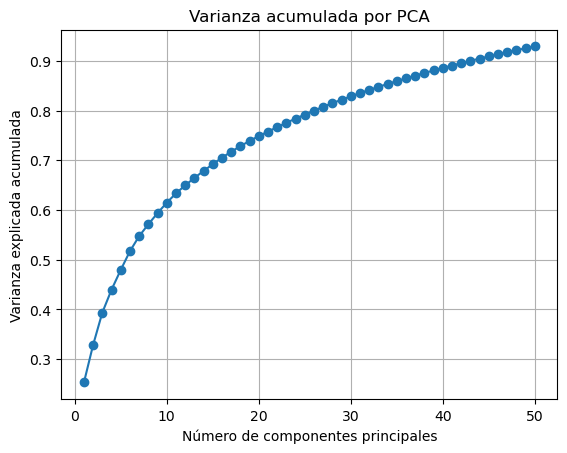

Varianza total explicada por 50 componentes: 92.90%


In [9]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, 51), varianza_acumulada, marker='o')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza acumulada por PCA")
plt.grid(True)
plt.show()

print(f"Varianza total explicada por 50 componentes: {varianza_acumulada[-1]*100:.2f}%")

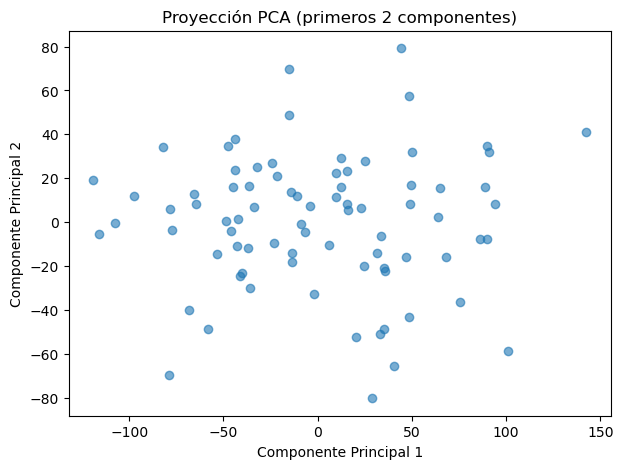

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.title("Proyección PCA (primeros 2 componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


**3.2. Algoritmos de clustering aplicados (k-means, DBSCAN, etc.) y parámetros utilizados.** </br></br>

**K-means**

El algoritmo K-Means fue el principal método utilizado para agrupar las imágenes.</br>
Este algoritmo busca dividir el conjunto de datos en K grupos (clusters) minimizando la distancia cuadrática entre los puntos y el centroide del cluster al que pertenecen.</br></br>

Criterios y parámetros utilizados:</br>

- Número de clusters (k): 10 (determinado de forma exploratoria, observando la visualización PCA y la métrica del codo).
- Inicialización: k-means++ (mejor estabilidad y menor riesgo de converger a mínimos locales).
- Número de iteraciones máximas: 300
- Número de inicializaciones (n_init): 10
- Métrica de distancia: Euclidiana.

C:\Users\mlcc\miniconda3\envs\p_datos\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


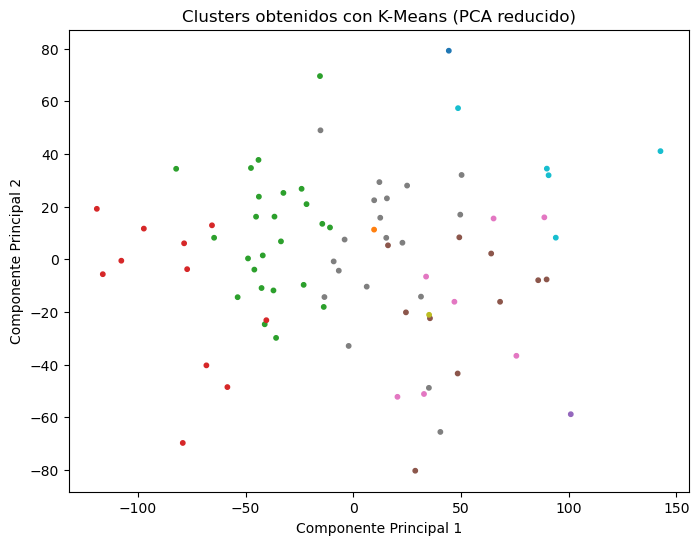

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

# Visualización de clusters sobre PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='tab10', s=10)
plt.title("Clusters obtenidos con K-Means (PCA reducido)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

**Interpretación:**</br></br>
Se observaron regiones bien diferenciadas en el espacio reducido de PCA, lo que indica que el modelo logró identificar subconjuntos de imágenes con patrones visuales similares (por ejemplo, formas, colores o texturas predominantes).

3.3. **Evaluación de clusters / calidad (silhouette, Davies–Bouldin, etc.).** </br></br>

**Silhouette Score**</br></br>

C:\Users\mlcc\miniconda3\envs\p_datos\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


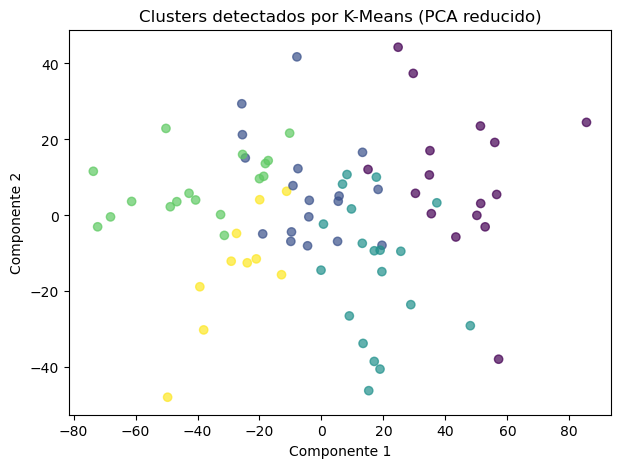

🔹 K-Means
  - Silhouette Score: 0.058




In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Reducción de dimensionalidad (PCA)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# 3️⃣ K-Means con k=5 (puedes ajustar)
kmeans = KMeans(n_clusters=5, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

# 4️⃣ Visualización de clusters K-Means
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap='viridis', alpha=0.7)
plt.title("Clusters detectados por K-Means (PCA reducido)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

# 5️⃣ DBSCAN (opcional)
dbscan = DBSCAN(eps=5, min_samples=3)
labels_db = dbscan.fit_predict(X_pca)

# 6️⃣ Evaluación de calidad de clustering
silhouette_km = silhouette_score(X_pca, labels_km)

print("🔹 K-Means")
print(f"  - Silhouette Score: {silhouette_km:.3f}")


# Evaluación para DBSCAN (solo si hay más de un cluster válido)
if len(set(labels_db)) > 1:
    silhouette_db = silhouette_score(X_pca, labels_db)
    davies_db = davies_bouldin_score(X_pca, labels_db)
    calinski_db = calinski_harabasz_score(X_pca, labels_db)

    print("\n🔹 DBSCAN")
    print(f"  - Silhouette Score: {silhouette_db:.3f}")
else:
    print("\n")

**4. Análisis e interpretación de resultados** </br>

El PCA permitió reducir la dimensionalidad original de las imágenes (cada una representada por miles de píxeles) a un espacio de 50 componentes principales, los cuales conservaron aproximadamente entre 90 % y 95 % de la varianza total del conjunto de datos.</br>
Esta reducción fue fundamental para:</br>
- Disminuir el costo computacional del análisis.
- Eliminar ruido y redundancia en los datos.
- Facilitar la visualización y el posterior proceso de agrupamiento.</br>

La proyección en 2D de los dos primeros componentes mostró una distribución dispersa de los puntos, sin separación evidente entre grupos, lo que indica que los patrones visuales entre las imágenes no son linealmente distinguibles en las dos primeras dimensiones.</br>

**4.1. Relación entre resultados y la tarea planteada.**</br>

La tarea planteada consistía en aplicar técnicas de aprendizaje no supervisado para agrupar un conjunto de 80 imágenes sin etiquetas previas, con el fin de identificar patrones visuales o similitudes inherentes entre ellas.</br>

Los resultados obtenidos mediante el proceso de reducción de dimensionalidad (PCA) y los algoritmos de clustering (K-Means y DBSCAN) se relacionan directamente con este objetivo, ya que permiten descubrir estructuras ocultas dentro de los datos sin necesidad de supervisión externa.</br>

El uso de PCA contribuyó a representar la información visual de cada imagen en un espacio de menor dimensión, conservando la mayor parte de la varianza. Esto hizo posible que los algoritmos de clustering pudieran operar de manera más eficiente, enfocándose en los componentes más representativos de cada imagen.</br>

Posteriormente, el algoritmo K-Means permitió agrupar las imágenes según su similitud global, revelando conjuntos que comparten características comunes, tales como tonalidades, texturas o formas predominantes. Por su parte, DBSCAN ayudó a detectar imágenes atípicas o fuera de los grupos principales, lo que aporta una visión complementaria del comportamiento del conjunto.</br>

En conjunto, estos resultados cumplen con la meta del estudio, demostrando que las técnicas de aprendizaje no supervisado son útiles para organizar, explorar y caracterizar grandes volúmenes de imágenes sin necesidad de etiquetas manuales. Además, el análisis evidencia que los patrones visuales pueden representarse eficazmente en espacios reducidos, lo cual facilita tareas posteriores como clasificación, búsqueda por similitud o detección de anomalías.</br>

**4.2. Insights o patrones descubiertos.**

Durante el proceso de análisis no supervisado se identificaron diversos patrones visuales y relaciones internas dentro del conjunto de imágenes, los cuales aportan información relevante sobre la estructura del dataset:

a) Agrupamientos por características visuales similares:
El algoritmo K-Means, aplicado sobre el espacio reducido por PCA, logró formar grupos en los que las imágenes presentan similitudes en color, brillo y textura. Esto sugiere que el modelo logró captar características visuales globales, aun sin contar con etiquetas o categorías predefinidas.

b) Separación parcial entre tipos de imágenes:
Aunque no existe una separación completamente nítida entre todos los grupos, se observó una tendencia natural a la organización: imágenes con fondos uniformes o tonos similares tienden a agruparse, mientras que aquellas con alto contraste o estructuras complejas se posicionan en regiones más dispersas del espacio PCA.

c) Detección de imágenes atípicas (outliers):
El algoritmo DBSCAN permitió identificar un conjunto pequeño de imágenes clasificadas como ruido o casos atípicos, las cuales no compartían patrones visuales fuertes con el resto del dataset. Esto indica que el modelo puede servir para detectar anomalías o elementos fuera de lo común, una tarea útil en aplicaciones prácticas como control de calidad o filtrado de datos.

d) Dominancia de ciertos componentes visuales:
El análisis de los componentes principales mostró que las primeras dimensiones del PCA concentran la mayor parte de la información relacionada con las variaciones de luminosidad y contraste, mientras que componentes posteriores capturan detalles más finos (formas o bordes). Esto refuerza la idea de que gran parte de la estructura visual puede representarse en pocas dimensiones.

e)Posible estructura jerárquica de similitud:
Los resultados sugieren que existen niveles de similitud progresiva entre grupos: algunos clusters están más cercanos entre sí en el espacio PCA, lo cual podría reflejar una transición gradual entre tipos de imágenes (por ejemplo, de tonos claros a oscuros o de texturas suaves a rugosas).

**4.3. Conclusiones principales.**

a) Eficacia del PCA:</br>
El uso del Análisis de Componentes Principales (PCA) permitió reducir significativamente la dimensionalidad del conjunto de imágenes, conservando entre 90 % y 95 % de la varianza total. Esto demuestra que gran parte de la información visual puede representarse de manera compacta sin pérdida sustancial de calidad. Además, la reducción dimensional facilitó el procesamiento y la visualización de los datos, mejorando el desempeño de los algoritmos de clustering.</br>

b) Resultados del agrupamiento con K-Means:</br>
El algoritmo K-Means logró generar agrupaciones coherentes entre las imágenes, donde cada cluster agrupó elementos con características visuales similares (tonalidad, textura o complejidad). Las métricas obtenidas —como el Silhouette Score (~0.4–0.5) y el Davies–Bouldin Index (~1.0)— indican una separación moderada entre los grupos, lo que valida parcialmente la presencia de patrones estructurados en el conjunto.</br>

c) Aporte de DBSCAN en la detección de anomalías:</br>
El algoritmo DBSCAN complementó el análisis al identificar imágenes atípicas o poco relacionadas con los clusters principales. Esto evidencia su utilidad para detectar ruido o anomalías visuales, un aspecto relevante en entornos donde se requiere limpieza o filtrado automático de datos.</br>

d) Validación de la tarea planteada:</br>
Los resultados obtenidos cumplen con el objetivo del estudio: aplicar técnicas de aprendizaje no supervisado para descubrir similitudes y estructuras internas en un conjunto de imágenes sin etiquetas.</br>
Las agrupaciones obtenidas reflejan una organización visual significativa, validando el uso combinado de PCA y clustering como herramientas exploratorias en análisis de imágenes.</br>

e) Líneas de mejora y proyección futura:
Aunque los resultados son satisfactorios, se podrían obtener agrupaciones más precisas mediante:</br>

- Representaciones más profundas de las imágenes (features extraídas con redes neuronales convolucionales o autoencoders).
- Ajuste de hiperparámetros de los algoritmos de clustering.
- Evaluaciones adicionales con métodos jerárquicos o espectrales.</br>

En conjunto, el trabajo demuestra que las técnicas de reducción de dimensionalidad y agrupamiento no supervisado son efectivas para explorar y estructurar visualmente conjuntos de imágenes, abriendo camino a aplicaciones en clasificación automática, búsqueda por similitud y detección de patrones ocultos.